In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, date

In [2]:
sectors = ['SPY', 'QQQ', 'GLD', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
volatility = ['VIXY', 'VIXM', 'SVOL'] #SHORTVOL and LONGVOL?
sectors = sectors + volatility

In [3]:
df_list= [pd.read_csv('data/' + sector + '.csv') for sector in sectors]
df_sector_vwap = pd.DataFrame([df_list[i]['vwap'] for i in range(len(df_list))])
df_sector_vwap = df_sector_vwap.T
df_sector_vwap.columns = sectors

df_sector_vwap.index = pd.to_datetime(df_list[0]['timestamp'], unit='ms')
df_sector_vwap.index = pd.to_datetime(df_sector_vwap.index.date)

In [4]:
today = str(datetime.now())
SPY_today = 509.75
QQQ_today = 432.29
VIXY_today = 13.11
VIXM_today = 15.3

current_value = { 'SPY' : {today : SPY_today}, 'QQQ' : {today : QQQ_today}, 'VIXY' : {today : VIXY_today}, 'VIXM' : {today : VIXM_today}}

index_vwap = df_sector_vwap[['SPY', 'QQQ', 'VIXY', 'VIXM']]
index_vwap = pd.concat([index_vwap, pd.DataFrame(current_value)])
index_vwap.index = pd.to_datetime(index_vwap.index)
index_vwap.index = index_vwap.index.date
index_vwap

,SPY,QQQ,VIXY,VIXM
2022-05-18,396.0277,295.1019,97.3775,35.9342
2022-05-19,390.3546,290.8032,100.2330,35.8875
2022-05-20,387.0485,286.7020,98.6995,35.8340
2022-05-23,395.1774,291.1174,95.1170,35.2649
2022-05-24,391.5536,285.9249,97.1475,35.7547
...,...,...,...,...
2024-05-13,521.0738,442.8695,12.0798,14.4797
2024-05-14,522.2996,444.4696,12.0175,14.4472
2024-05-15,528.0601,450.5850,11.5351,14.1124
2024-05-16,529.8408,453.1313,11.4665,14.0751


In [5]:
import talib as ta
import matplotlib.pyplot as plt

In [6]:
sector_ema = pd.DataFrame()
index_ema_today = pd.DataFrame()
sector_sma = pd.DataFrame()
index_sma_today = pd.DataFrame()
bbands = pd.DataFrame()

In [7]:
for col in df_sector_vwap.columns:
    sector_ema[col] = ta.EMA(df_sector_vwap[col], timeperiod=20)
    sector_sma[col] = ta.SMA(df_sector_vwap[col], timeperiod=20)

for col in index_vwap.columns:
    index_ema_today[col] = ta.EMA(index_vwap[col], timeperiod=20)
    index_sma_today[col] = ta.SMA(index_vwap[col], timeperiod=20)

for col in df_sector_vwap.columns:
    bbands[col + 'upper'], bbands[col + 'mid'], bbands[col + 'lower'] = ta.BBANDS(df_sector_vwap[col], timeperiod=50, nbdevup=2, nbdevdn=2, matype=0)

In [8]:
sector_df = pd.DataFrame()
index_df_today = pd.DataFrame()

In [9]:
sector_diff = ((sector_ema - sector_sma)/sector_sma) * 10000
index_diff_today = ((index_ema_today - index_sma_today)/index_sma_today) * 10000

sector_diff

,SPY,QQQ,GLD,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VIXY,VIXM,SVOL
2022-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,79.318581,94.364164,-68.624315,53.813392,100.513391,58.310762,-30.242558,66.182573,72.785641,59.380959,71.515883,134.313338,103.450571,108.862849,-323.968591,-162.463243,69.069661
2024-05-13,84.453816,104.312847,-56.789706,60.663729,98.035503,53.399204,-22.655541,64.419737,71.450195,64.664619,79.059174,138.450016,117.974942,104.975583,-299.667368,-143.314622,63.753960
2024-05-14,84.844447,109.879946,-37.982512,64.680920,89.133623,42.635000,-24.198330,55.951543,67.988934,62.955325,78.350347,135.509436,128.307524,88.301470,-259.042683,-118.912244,54.926296
2024-05-15,86.545869,115.761131,-16.114122,69.379092,78.768997,32.252411,-25.518789,49.711193,68.436487,59.990304,78.064618,134.370468,141.549652,80.704552,-233.812319,-107.498026,51.141985


In [10]:
sector_diff = sector_diff.dropna()
index_diff_today = index_diff_today.dropna()

sector_diff

,SPY,QQQ,GLD,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VIXY,VIXM,SVOL
2022-06-15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-06-16,-39.813430,-39.375091,-8.313775,-39.043260,-46.508931,-19.844770,-68.563763,-49.902228,-33.698433,-33.297938,-55.417100,-42.798201,-45.548661,-47.560075,75.074421,38.268173,-21.420432
2022-06-17,-82.423006,-76.860904,-10.108736,-67.160240,-85.603541,-52.358894,-156.855072,-94.695645,-61.211686,-71.427217,-104.354489,-80.276337,-87.409775,-96.077943,143.304662,63.124074,-43.704001
2022-06-21,-113.067113,-103.483089,-13.717671,-89.478288,-119.321946,-77.752360,-222.098208,-131.380771,-73.341565,-106.149089,-144.220617,-105.784647,-119.595999,-132.059961,175.779679,70.637014,-45.089309
2022-06-22,-128.339286,-118.957706,-11.926561,-97.689980,-146.742739,-86.646755,-279.828082,-144.740487,-65.618497,-128.565537,-170.722927,-111.527705,-136.644972,-147.442877,187.249838,71.704409,-43.572215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-10,79.318581,94.364164,-68.624315,53.813392,100.513391,58.310762,-30.242558,66.182573,72.785641,59.380959,71.515883,134.313338,103.450571,108.862849,-323.968591,-162.463243,69.069661
2024-05-13,84.453816,104.312847,-56.789706,60.663729,98.035503,53.399204,-22.655541,64.419737,71.450195,64.664619,79.059174,138.450016,117.974942,104.975583,-299.667368,-143.314622,63.753960
2024-05-14,84.844447,109.879946,-37.982512,64.680920,89.133623,42.635000,-24.198330,55.951543,67.988934,62.955325,78.350347,135.509436,128.307524,88.301470,-259.042683,-118.912244,54.926296
2024-05-15,86.545869,115.761131,-16.114122,69.379092,78.768997,32.252411,-25.518789,49.711193,68.436487,59.990304,78.064618,134.370468,141.549652,80.704552,-233.812319,-107.498026,51.141985


In [11]:
sector_diff.info()
index_diff_today.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 483 entries, 2022-06-15 to 2024-05-16
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     483 non-null    float64
 1   QQQ     483 non-null    float64
 2   GLD     483 non-null    float64
 3   XLC     483 non-null    float64
 4   XLY     483 non-null    float64
 5   XLP     483 non-null    float64
 6   XLE     483 non-null    float64
 7   XLF     483 non-null    float64
 8   XLV     483 non-null    float64
 9   XLI     483 non-null    float64
 10  XLB     483 non-null    float64
 11  XLRE    483 non-null    float64
 12  XLK     483 non-null    float64
 13  XLU     483 non-null    float64
 14  VIXY    483 non-null    float64
 15  VIXM    483 non-null    float64
 16  SVOL    483 non-null    float64
dtypes: float64(17)
memory usage: 67.9 KB
<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 2022-06-15 to 2024-05-17
Data columns (total 4 columns):
 #   Column  Non

In [12]:
#Rate of change of the sector_diff

sector_diff_delta = pd.DataFrame()
sector_diff_delta['delta'] = (sector_diff.iloc[-1] - sector_diff.iloc[-3]) / abs(sector_diff.iloc[-3])
#sector_diff_delta['delta2'] = sector_diff.apply(ta.ROCP, timeperiod=2)
sector_diff_delta_disp = sector_diff_delta.sort_values('delta', axis=0, ascending=False)

index_diff_delta = pd.DataFrame()
index_diff_delta['delta'] = (index_diff_today.iloc[-1] - index_diff_today.iloc[-3]) / abs(index_diff_today.iloc[-3])
#index_diff_delta['delta2'] = index_diff_delta.apply(ta.ROCP, timeperiod=2)
index_diff_delta_disp = index_diff_delta.sort_values('delta', axis=0, ascending=False)

print(sector_diff_delta_disp)
print(index_diff_delta_disp)
#sector_diff_delta['delta_func'] = ta.ROCR100(sector_diff.values, timeperiod=3)



         delta
GLD   1.108652
VIXM  0.238617
VIXY  0.208850
XLC   0.174022
XLK   0.140102
QQQ   0.071070
SPY   0.011281
XLV  -0.006864
XLRE -0.049900
XLB  -0.051197
XLE  -0.051206
XLI  -0.134314
SVOL -0.136804
XLU  -0.183526
XLF  -0.184102
XLY  -0.271263
XLP  -0.316049
         delta
VIXM  0.738604
VIXY  0.611408
QQQ  -0.256124
SPY  -0.294834


In [13]:
sector_diff_delta = sector_diff.pct_change(2)
index_diff_today_delta = index_diff_today.pct_change(2)
sector_diff_accel = sector_diff_delta.pct_change(2)
index_diff_today_accel = index_diff_today_delta.pct_change(2)
index_diff_today_accel2 = index_diff_today_delta.pct_change(3)
index_diff_today_accel3 = index_diff_today_delta.pct_change(4
                                                            )

In [14]:
#How to concat the last row of each df ---

sector_snapshot = pd.concat([sector_diff.iloc[-1], sector_diff_delta.iloc[-1], sector_diff_accel.iloc[-1]], axis=1)
sector_snapshot.columns = ['diff', 'delta', 'accel']
sector_snapshot

index_snapshot = pd.concat([index_diff_today.iloc[-1], index_diff_today_delta.iloc[-1], index_diff_today_accel.iloc[-1], index_diff_today_accel2.iloc[-1], index_diff_today_accel3.iloc[-1]], axis=1)
index_snapshot.columns = ['diff', 'delta', 'accel', 'accel2', 'accel3']

index_snapshot.sort_values('diff', ascending=False)

#This one is pretty legit

,diff,delta,accel,accel2,accel3
QQQ,86.111881,-0.256124,-3.333718,-2.557702,-1.763313
SPY,61.029216,-0.294834,-12.902109,-5.232061,-2.268601
VIXM,-28.099569,-0.738604,1.955410,1.755298,3.051494
VIXY,-90.857581,-0.611408,1.782156,2.050816,3.948703


How do we get the value that would keep the security above

In [15]:
sector_diff_sorted = sector_diff.iloc[-1].T.sort_values(axis=0, ascending=False)
index_diff_sorted = index_diff_today.iloc[-1].T.sort_values(axis=0, ascending=False)

print(sector_diff_sorted)
print(index_diff_sorted)

sector_diff_delta_disp.assign(diff = sector_diff_sorted).sort_values('diff', axis=0, ascending=False)

XLK     146.283641
XLRE    128.747543
QQQ     117.689157
SPY      85.801584
XLC      75.936811
XLB      74.339017
XLU      72.095821
XLV      67.522289
XLY      64.955012
XLI      54.499535
SVOL     47.412164
XLF      45.650779
XLP      29.160245
GLD       4.126870
XLE     -25.437420
VIXM    -90.537799
VIXY   -204.941709
Name: 2024-05-16 00:00:00, dtype: float64
QQQ     86.111881
SPY     61.029216
VIXM   -28.099569
VIXY   -90.857581
Name: 2024-05-17, dtype: float64


,delta,diff
XLK,0.140102,146.283641
XLRE,-0.049900,128.747543
QQQ,0.071070,117.689157
SPY,0.011281,85.801584
XLC,0.174022,75.936811
XLB,-0.051197,74.339017
XLU,-0.183526,72.095821
XLV,-0.006864,67.522289
XLY,-0.271263,64.955012
XLI,-0.134314,54.499535


In [16]:
index_diff_today.info()

<class 'pandas.core.frame.DataFrame'>
Index: 484 entries, 2022-06-15 to 2024-05-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     484 non-null    float64
 1   QQQ     484 non-null    float64
 2   VIXY    484 non-null    float64
 3   VIXM    484 non-null    float64
dtypes: float64(4)
memory usage: 18.9+ KB


In [17]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [18]:
px.line(data_frame=sector_diff).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


In [19]:
px.line(data_frame=df_sector_vwap['SPY'].loc['2022-02-15 04:00:00':])

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [20]:
fig = go.Figure(
    make_subplots(rows=3, cols=1, shared_xaxes='all')
)
for sector in sectors:
    fig.add_trace(go.Scatter(name=sector, y=sector_diff[sector], x=sector_diff.index), row=1, col=1)

In [21]:
df = pd.read_csv('data/QQQ.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
#fig.add_trace(name='raw', x=)
fig.add_hline(0)
fig.add_trace(go.Scatter(x=df.index, y=df['vwap']), row=2, col=1)
fig.add_trace(go.Scatter(x=sector_diff.index, y=sector_diff['QQQ']), row=3, col=1)
fig.show()

C:\Users\quack\AppData\Local\Temp\ipykernel_15084\3875102436.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [22]:
import scipy.stats as stats

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\scipy\__init__.py:146: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0



In [23]:
zscore = lambda x: (x[-1] - x.mean()) / x.std()
sector_diff_z = sector_diff.rolling(30).apply(zscore).rolling(5).mean()

C:\Users\quack\AppData\Local\Temp\ipykernel_15084\716367803.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [24]:
px.line(data_frame=sector_diff_z['2022-03-04':][['SPY', 'QQQ']]).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [25]:
sectors = ['XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
condensed_df = pd.DataFrame()
condensed_df['volatility'] = (sector_diff['VIXY'] + sector_diff['VIXM']) / 2
condensed_df['sector_avg'] = sum([sector_diff[sector] for sector in sectors]) / len(sectors)
condensed_df['long_bonds'] = sector_diff['TLT']
condensed_df['metals'] = sector_diff['GLD']

KeyError: 'TLT'

In [ ]:
px.line(data_frame=condensed_df).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import seaborn as sns

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

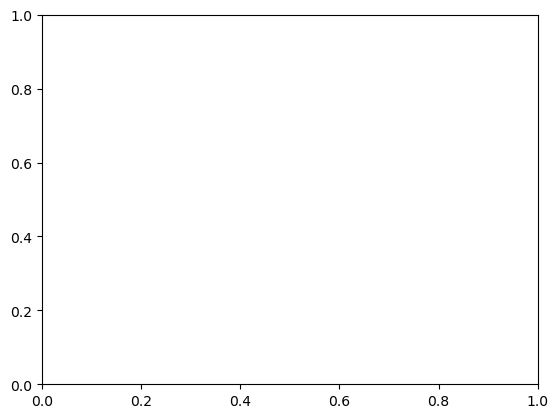

In [ ]:
sns.kdeplot(data=condensed_df)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

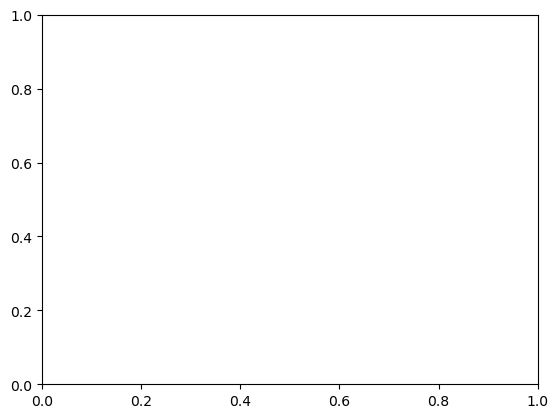

In [ ]:
sns.kdeplot(data=sector_diff)

In [ ]:
#Divide by abs of z score?

In [ ]:
fig = go.Figure()
for sector in sectors:
    fig.add_trace(go.Scatter(name=sector, y=sector_diff[sector], x=sector_diff.index))